# Downloading Data
## New York City's Flood Zone Exploratory Data Analysis  
Author: Mark Bauer

# 1. Introduction

This notebook demonstrates how to analyze FEMA's Preliminary Flood Insurance Rate Map (i.e. PFIRM), sometimes known as '*flood zone*.' The flood zone is for New York City (all five boroughs). Let's see what cool things we can discover about this dataset!

# Resources Before Getting Started

NYC's Preliminary Flood Insurance Rate Map (PFIRM) data can be downloaded here:  
http://www.region2coastal.com/view-flood-maps-data/view-preliminary-flood-map-data/

![website](images/fema-pfirm-website.png)

*Figure 1. Screenshot of website of the pfirm data*

![image](images/data-for-nyc.png)

*Figure 2. Screenshot of data section for New York City*

About the data: 
>The Digital Flood Insurance Rate Map (DFIRM) Database depicts flood risk information and supporting data used to develop the risk data. The primary risk classifications used are the 1-percent-annual-chance flood event, the 0.2-percent-annual-chance flood event, and areas of minimal flood risk. The DFIRM Database is derived from Flood Insurance Studies (FISs), previously published Flood Insurance Rate Maps (FIRMs), flood hazard analyses performed in support of the FISs and FIRMs, and new mapping data, where available. The FISs and FIRMs are published by the Federal Emergency Management Agency (FEMA). The file is georeferenced to earth's surface using the State Plane projection and coordinate system. The specifications for the horizontal control of DFIRM data files are consistent with those required for mapping at a scale of 1:12,000.

General identification information about this dataset
>Originator: Federal Emergency Management Agency  
Publication_Date: 20150130  
Title: DIGITAL FLOOD INSURANCE RATE MAP DATABASE,  CITY OF NEW YORK, NEW YORK  
Geospatial_Data_Presentation_Form: FEMA-DFIRM-Preliminary  
Publication_Information:
>Publication_Place: Washington, DC  
Publisher: Federal Emergency Management Agency  
Online_Linkage: https://msc.fema.gov    

To read the full Preliminary Flood Insurance Study mentioned above:  
https://msc.fema.gov/portal/downloadProduct?productID=360497V000B    

# Import Libraries

In [1]:
# importing libraries
import geopandas as gpd
import urllib.request
import zipfile
from zipfile import ZipFile

In [2]:
print('printing packages and versions:\n')

%reload_ext watermark
%watermark -v -p numpy,pandas,seaborn,matplotlib.pyplot,geopandas

printing packages and versions:

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy            : 1.23.1
pandas           : 1.4.3
seaborn          : 0.11.2
matplotlib.pyplot: unknown
geopandas        : 0.11.1



![copy_data_address](images/copy-data-address.png)

*Figure 4. Screenshot of data path*

Uncomment the code below to download the files from the web.

In [3]:
# url path from the web
url = 'https://msc.fema.gov/portal/downloadProduct?productID=360497_PRELIMDB'

# assigning file name as 'pfirm_nyc.zip'
urllib.request.urlretrieve(url, 'data/pfirm-nyc.zip')

('data/pfirm-nyc.zip', <http.client.HTTPMessage at 0x16c8d2c70>)

In [4]:
ls data/

pfirm-nyc.zip


In [5]:
path = 'data/pfirm-nyc.zip'

# opening zip using 'with' keyword in read mode
with zipfile.ZipFile(path, 'r') as file:
    # extracing all items in our zipfile
    # naming our file 'pfirm-nyc'
    file.extractall('data/pfirm-nyc')
    
%ls data/pfirm-nyc/     

360497_PRELIM_metadata.txt  s_fld_haz_ar.shx
360497_PRELIM_metadata.xml  s_fld_haz_ln.dbf
L_PAN_REVIS.dbf             s_fld_haz_ln.shp
L_POL_FHBM.dbf              s_fld_haz_ln.shx
S_BASE_INDEX.prj            s_gen_struct.dbf
S_BFE.prj                   s_gen_struct.shp
S_CBRS.prj                  s_gen_struct.shx
S_CST_TSCT_LN.dbf           s_label_ld.dbf
S_CST_TSCT_LN.prj           s_label_ld.prj
S_CST_TSCT_LN.shp           s_label_ld.sbn
S_CST_TSCT_LN.shx           s_label_ld.sbx
S_FIRM_PAN.prj              s_label_ld.shp
S_FLD_HAZ_AR.prj            s_label_ld.shx
S_FLD_HAZ_LN.prj            s_label_pt.dbf
S_GEN_STRUCT.prj            s_label_pt.prj
S_LiMWA.dbf                 s_label_pt.sbn
S_LiMWA.prj                 s_label_pt.sbx
S_LiMWA.shp                 s_label_pt.shp
S_LiMWA.shx                 s_label_pt.shx
S_PERM_BMK.prj              s_perm_bmk.dbf
S_POL_AR.prj                s_perm_bmk.shp
S_POL_LN.prj                s_perm_bmk.shx
S_QUAD_INDEX.prj            s_pol_ar.dbf

In [6]:
# reading in shape file
path = 'data/pfirm-nyc/s_fld_haz_ar.shp'
pfirm_df = gpd.read_file(path)

# previewing first five rorws of data
pfirm_df.head()

,FLD_AR_ID,FLD_ZONE,FLOODWAY,SFHA_TF,STATIC_BFE,V_DATUM,DEPTH,LEN_UNIT,VELOCITY,VEL_UNIT,AR_REVERT,BFE_REVERT,DEP_REVERT,SOURCE_CIT,geometry
0,81,AE,None,T,13.0,NAVD88,-9999.0,FEET,-9999.0,None,None,-9999.0,-9999.0,STUDY4,"POLYGON ((1032001.691 263867.839, 1032006.047 ..."
1,82,X,None,F,-9999.0,None,-9999.0,None,-9999.0,None,None,-9999.0,-9999.0,STUDY4,"POLYGON ((1033748.952 263778.464, 1033752.656 ..."
2,83,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,None,F,-9999.0,None,-9999.0,None,-9999.0,None,None,-9999.0,-9999.0,STUDY4,"POLYGON ((1033309.701 263544.181, 1033322.210 ..."
3,84,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,None,F,-9999.0,None,-9999.0,None,-9999.0,None,None,-9999.0,-9999.0,STUDY4,"POLYGON ((1033414.148 262658.868, 1033414.934 ..."
4,85,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,None,F,-9999.0,None,-9999.0,None,-9999.0,None,None,-9999.0,-9999.0,STUDY4,"POLYGON ((1034089.115 262466.034, 1034089.402 ..."


In [7]:
rows = pfirm_df.shape[0]
columns = pfirm_df.shape[1]

print('number of rows: {:,}.\nnumber of columns: {}.'.format(rows, columns))

number of rows: 3,985.
number of columns: 15.


In [8]:
pfirm_df.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

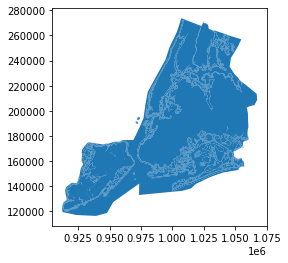

In [9]:
pfirm_df.plot()